# Análise de dados - Heart Disease Dataset (UCI)
Disciplina de introdução à Ciência de dados - Prof. Rodrigo Mello

ICMC - USP, 2o semestre de 2020

## Integrante - Número USP:
* Guilherme Milan Santos - 9012966
* Teh Led Red - 10368927
* Rafael Marques - 9846045

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import math
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Análise exploratória

In [5]:
heart = pd.read_csv('data/heart.csv')
print(heart.shape)
heart.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


O banco de dados contém 297 registros de 14 variáveis, sendo que cada registro representa informações fisiológicas sobre um paciente. As variáveis age, trestbps, chol, thalach e oldpeak são numéricas, sex, cp, fbs, resecg, exang, slope, ca, thal e condition são categóricas. 
 
A variável condition representa a presença de doenças cardíacas no paciente. O valor 0 indica a ausência e 1 a presença de doenças cardíacas no paciente.

As variáveis explicativas são como se segue:
1. age: idade do paciente

2. sex: gênero do paciente. 1 indica masculino, 0 indica feminino.

3. cp (chest pain): tipo de dor no peito  reportada pelo indivíduo. Valores possíveis: 0 (angina comum), 1 (angina incomum), 2 (dor não anginar), 3 (assintomático). Angina é a dor resultante do estreitamento das artérias que conduzem ao coração [1], que levam ao baixo abastecimento do coração com oxigênio e nutrientes. Costumam indicar obstrução ou contrações involuntárias das artérias coronárias.

4. trestbps (resting blood pressure): pressão sanguínea durante repouso em mmHg. Alta pressão sanguínea durante períodos prolongados provocam o estreitamento e eventual ruptura ou vazamento dos vasos sanguíneos, podendo aumentar o risco de doenças cardiovasculares.

5. chol (cholesterol): nível de LDL (low density lipoprotein, ou"colesterol ruim") no sangue. O LDL provoca o estreitamento das artérias, constituindo portanto um possível preditor de doenças cardíacas.

6. fbs (fasting blood sugar): variável binária que indica se o nível de açúcar no sangue do paciente é maior que 120 miligramas por decilitro de sangue. 0 significa falso (não é maior), 1 significa verdadeiro (é maior). Esta variável pode indicar a má resposta do organismo à produção de insulina, o que pode levar a problemas como pressão alta [2] e, consequentemente, a problemas cardiovasculares.

7. restecg (resting electrocardiogram): resultado do exame de eletrocardiograma. Valores possíveis: 0 (normal), 1 (anormalidade no sinal ST-T), 2 (provável caso de hipertrofia ventricular esquerda). A condição de hipertrofia ventricular esquerda indica o aumento da espessura da parede ventrículo esquerdo, câmara responsável por bombear o sangue pelo resto do corpo. Isto costuma ocorrer em resposta a fatores externos, como aumento da pressão sanguínea ou presença de doenças cardiovasculares.

8. thalach: máxima frequência cardíaca observada. O estudo pode inferir se frequências cardíacas mais altas podem estar associadas à ocorrência de doenças cardíacas.

9. exang: se a realização de exercícios físicos induziu angina. Valores possíveis: 0 (não ocorreu) e 1 (ocorreu).

10. oldpeak (peak exercise ST segment): indica a duração da depressão do segmento ST do sinal obtido pelo exame de eletrocardiograma. Uma depressão ou inclinação decrescente do segmento ST pode indicar a presença de doenças cardíacas associadas à redução da circulação sanguínea, como taquicardias.

11. slope: A inclinação do segmento ST do eletrocardiograma durante a realização de execícios físicos intensos. Valores possíveis: 1 (crescente), 2 (plano) e 3 (decrescente)

12. ca: Número de vasos sanguíneos colorizados por fluoroscopia. Exames de fluoroscopia estão relacionados com a medição da densidade dos vasos sanguíneos [3]. Isto os torna potenciais indicadores de problemas relacionados à pressão sanguínea e, portanto, de doenças cardiovasculares.

13. thal: variável categórica significando o status quanto à doença denominada talassemia, que provoca a redução da quantidade de hemoglobina em circulação no sangue. Pode assumir 3 valores: 3 (normal), 6 (defeito fixo) e 7 (defeito reversível)

In [6]:
print(heart.dtypes)

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


Nota-se que a única variável real é oldpeak. As variáveis categóricas foram interpretadas como valores inteiros.

In [7]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Excepcionalmente, não há valores nulos no dataset.

Text(0.5, 1.0, 'Número de pacientes doentes por idade')

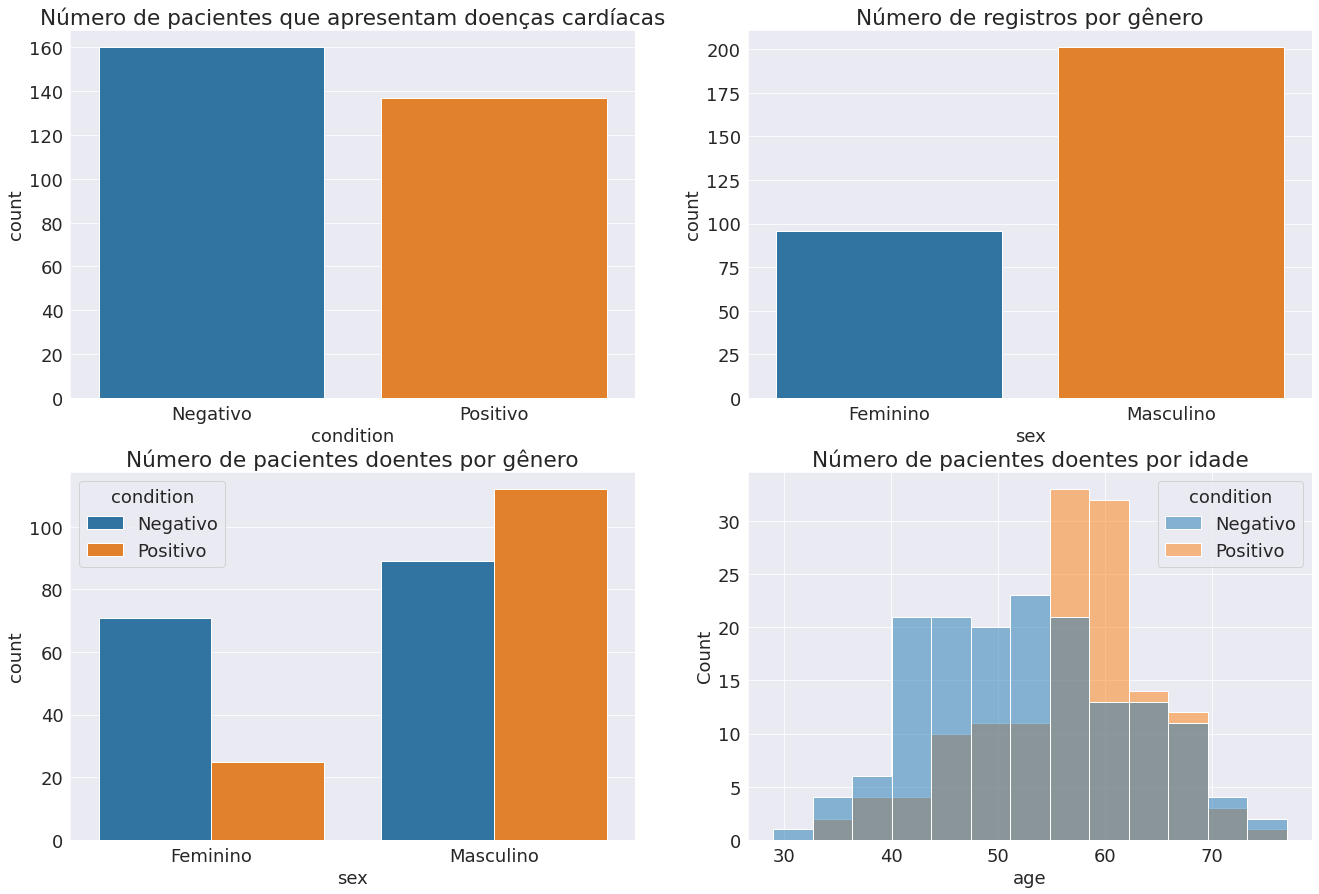

In [13]:
gender_categories = ['Feminino', 'Masculino']
cp_categories =  ['Ang. típica', 'Ang. atípica', 'Não anginal', 'Assintom.']
fbs_categories = ['< 120mg/dl', '>= 120mg/dl']
restecg_categories = ['Normal', 'Anomalia ST-T', 'Hipertrof. ventric. esq.']
exang_categories = ['Negativo', 'Positivo']
slope_categories = ['Ascendente', 'Plana', 'Descendente']
thal_categories = ['Normal', 'Defeito fixo', 'Def. reversível']
condition_categories = ['Negativo', 'Positivo']


exp_heart = heart.copy()
exp_heart.condition = exp_heart.condition.map(lambda x: condition_categories[x])
exp_heart.sex = exp_heart.sex.map(lambda x: gender_categories[x])
exp_heart.cp = exp_heart.cp.map(lambda x: cp_categories[x])
exp_heart.fbs = exp_heart.fbs.map(lambda x: fbs_categories[x])
exp_heart.restecg = exp_heart.restecg.map(lambda x: restecg_categories[x])
exp_heart.exang = exp_heart.exang.map(lambda x: exang_categories[x])
exp_heart.slope = exp_heart.slope.map(lambda x: slope_categories[x])
exp_heart.thal = exp_heart.thal.map(lambda x: thal_categories[x-1])

exp_heart.condition = pd.Categorical(exp_heart.condition, categories=condition_categories, ordered=False)
exp_heart.sex = pd.Categorical(exp_heart.sex, categories=gender_categories, ordered=False)
exp_heart.cp = pd.Categorical(exp_heart.cp, categories=cp_categories, ordered=False)
exp_heart.fbs = pd.Categorical(exp_heart.fbs, categories=fbs_categories, ordered=False)
exp_heart.restecg = pd.Categorical(exp_heart.restecg, categories=restecg_categories, ordered=False)
exp_heart.exang = pd.Categorical(exp_heart.exang, categories=exang_categories, ordered=False)
exp_heart.slope = pd.Categorical(exp_heart.slope, categories=slope_categories, ordered=False)
exp_heart.thal = pd.Categorical(exp_heart.thal, categories=thal_categories, ordered=False)

fig, axis = plt.subplots(2,2, figsize=(6,6))
plt.rcParams.update({'font.size': 18})

plt.subplots_adjust(top=2, right=3)

sns.countplot(data=exp_heart, x="condition", ax=axis[0,0]);
axis[0,0].set_title('Número de pacientes que apresentam doenças cardíacas');

sns.countplot(data=exp_heart, x="sex", ax=axis[0,1])
axis[0,1].set_title('Número de registros por gênero')

sns.countplot(data=exp_heart, x="sex", hue="condition", ax=axis[1,0])
axis[1,0].set_title('Número de pacientes doentes por gênero')

sns.histplot(data=exp_heart, x="age", hue="condition", ax=axis[1,1])
axis[1,1].set_title('Número de pacientes doentes por idade')

O dataset é balanceado com relação ao número de pacientes sem e com doenças cardiovasculares: há aproximadamente 160 registros de pacientes saudáveis e 140 de pacientes com patologias. O número de pacientes por gênero aparenta ser mais desequilibrado, contando com mais de 200 homens e aproximadamente 100 mulheres.

O gráfico de presença de doença por gênero indica que pode haver uma relação entre doença e gênero: uma proporção maior de homens apresenta doença diante do total de pacientes daquele gênero, enquanto no sexo feminino há mais pacientes saudáveis do que doentes.

Com relação à idade, há maior número de pacientes doentes entre aproximadamente 55 e 70 anos. Nas demais faixas de idade, o número de pacientes saudáveis supera o de pacientes com doenças cardíacas.

Text(0.5, 1.0, 'Número de vasos sanguíneos colorizados por fluoroscopia')

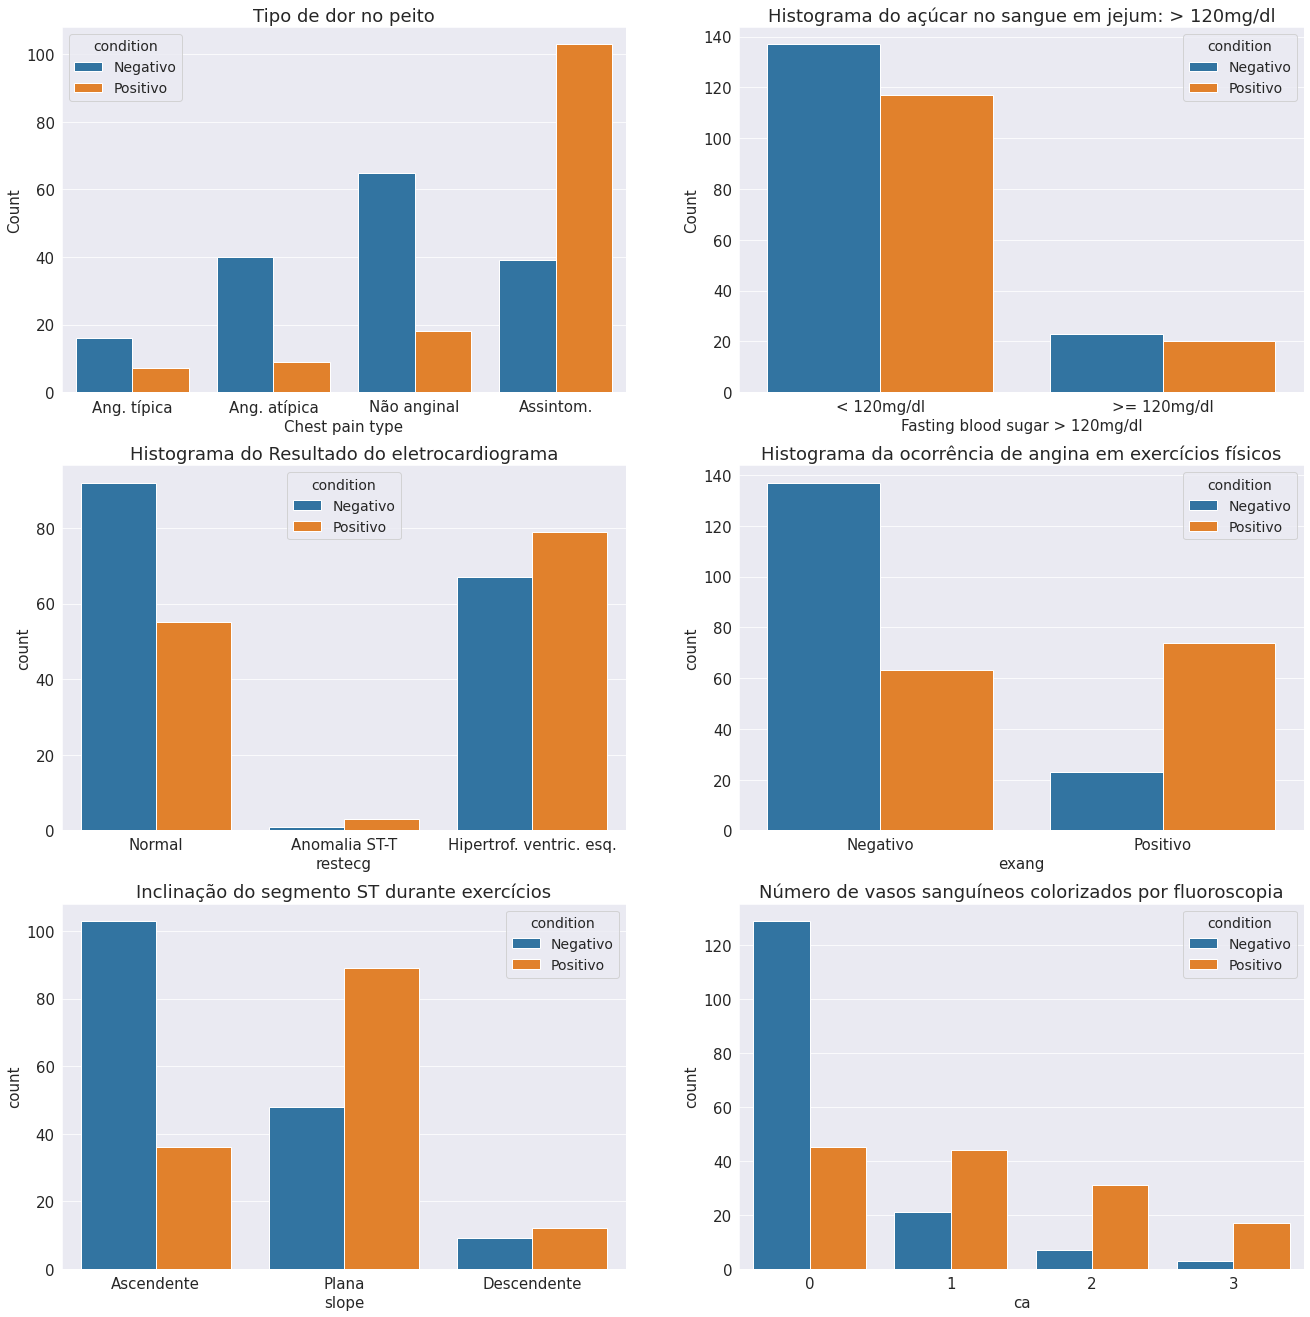

In [16]:
fig, axis = plt.subplots(3, 2, figsize=(6,6))
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(top=3, right=3)

sns.countplot(data=exp_heart, x="cp", hue="condition", ax=axis[0,0])
axis[0,0].set_xlabel('Chest pain type')
axis[0,0].set_ylabel('Count')
axis[0,0].set_title('Tipo de dor no peito', fontsize=18)

sns.countplot(data=exp_heart, x="fbs", hue="condition", ax=axis[0,1])
axis[0,1].set_xlabel('Fasting blood sugar > 120mg/dl')
axis[0,1].set_ylabel('Count')
axis[0,1].set_title('Histograma do açúcar no sangue em jejum: > 120mg/dl', fontsize=18)

sns.countplot(data=exp_heart, x="restecg", hue="condition", ax=axis[1,0]);
axis[1,0].set_title('Histograma do Resultado do eletrocardiograma', fontsize=18)

sns.countplot(data=exp_heart, x="exang", hue="condition", ax=axis[1,1])
axis[1,1].set_title('Histograma da ocorrência de angina em exercícios físicos', fontsize=18)

sns.countplot(data=exp_heart, x="slope", hue="condition", ax=axis[2,0])
axis[2,0].set_title('Inclinação do segmento ST durante exercícios', fontsize=18)

sns.countplot(data=exp_heart, x="ca", hue="condition", ax=axis[2,1])
axis[2,1].set_title('Número de vasos sanguíneos colorizados por fluoroscopia', fontsize=18)

Curiosamente, pacientes assintomáticos quanto a dor peitoral demonstraram maior proporção de doentes do que os que apresentaram dores. Considerando a realização de exercícios, no entanto, os pacientes que tiveram dores eram, em sua maioria, portadores de doenças cardíacas. 

Dos demais atributos, o que apresenta maior indicação de doenças cardíacas é o número de vasos sanguíneos colorizados por fluoroscopia. Quanto maior o número de vasos colorizados no exame, maior a proporção de pacientes portadores de doenças.

Text(0.5, 1.0, 'Declínio do Segmento ST em pico de atividade física')

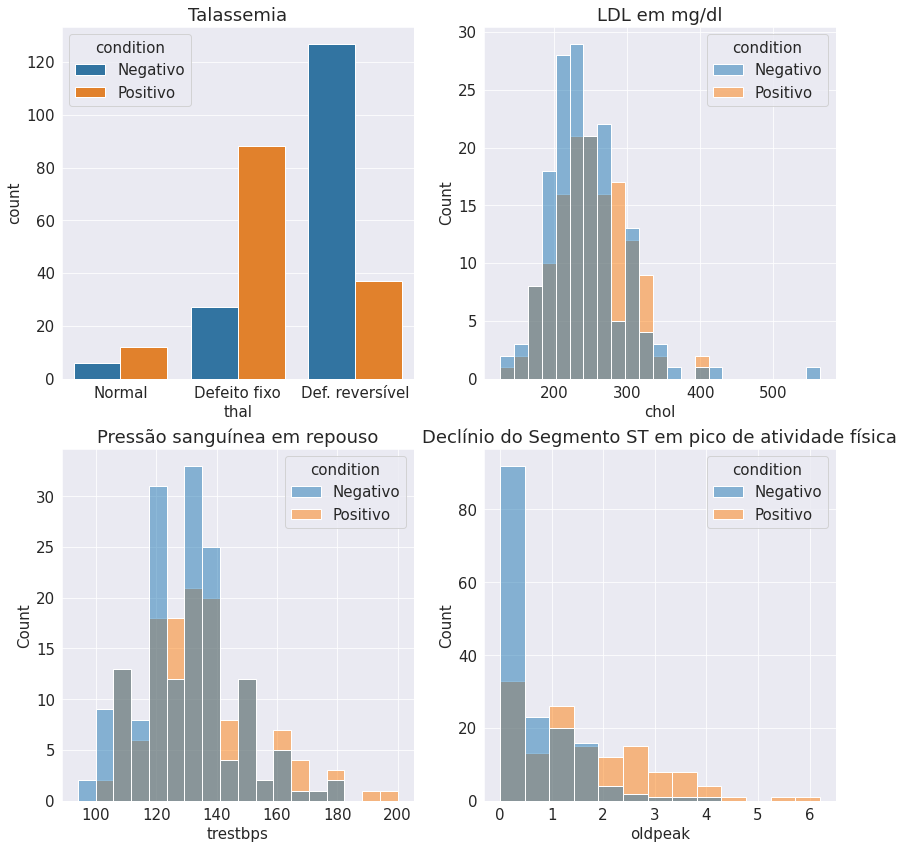

In [21]:
fig, axis = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(top=1.2, right=1.2)
plt.rcParams.update({'font.size': 15})

sns.countplot(data=exp_heart, x="thal", hue="condition", ax=axis[0,0]);
axis[0,0].set_title("Talassemia")

sns.histplot(exp_heart, x="chol", hue="condition", ax=axis[0,1]);
axis[0,1].set_title("LDL em mg/dl")

sns.histplot(exp_heart, x="trestbps", hue="condition", ax=axis[1,0]);
axis[1,0].set_title("Pressão sanguínea em repouso")

sns.histplot(exp_heart, x="oldpeak", hue="condition", ax=axis[1,1]);
axis[1,1].set_title("Declínio do Segmento ST em pico de atividade física")

A variável "thal" indicando diferentes categorias de talassemia aparente ser um possível critério indicador de presença de doenças cardíacas. A variável oldpeak, que representa o grau de declínio do segmento ST do eletrocardiograma, também pode ser um possível critério de detecção.

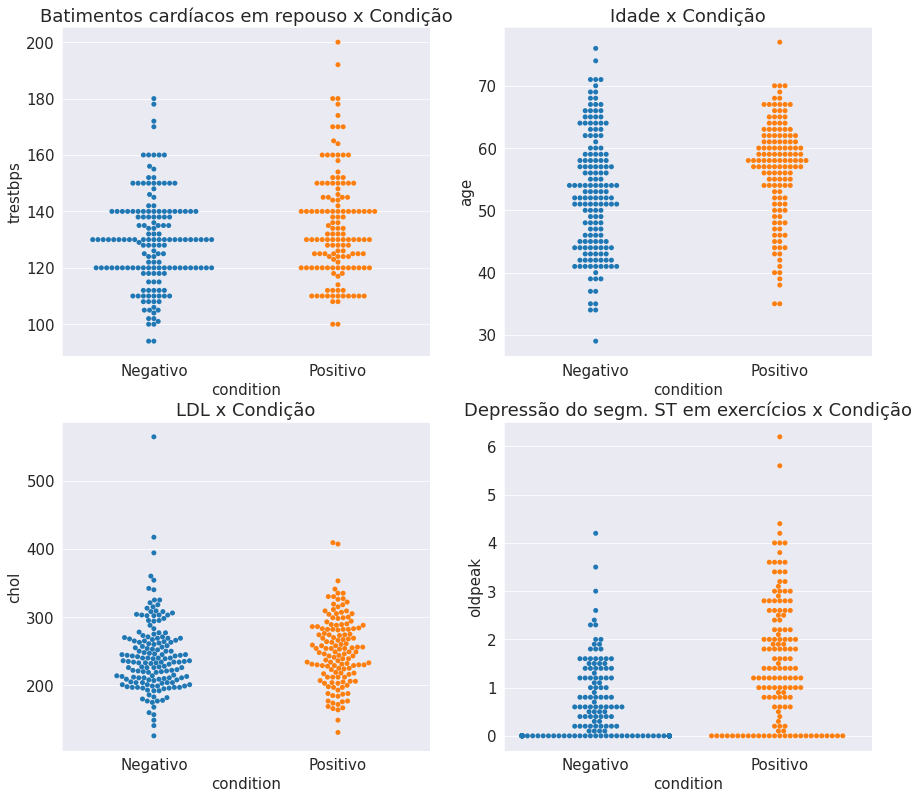

In [22]:
fig, axis = plt.subplots(2, 2, figsize=(6,6))
plt.subplots_adjust(top=1.8, right=2)
plt.rcParams.update({'font.size': 15})

sns.swarmplot(data=exp_heart, x="condition", y="trestbps", ax=axis[0,0])
axis[0,0].set_title("Batimentos cardíacos em repouso x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="age", ax=axis[0,1])
axis[0,1].set_title("Idade x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="chol", ax=axis[1,0])
axis[1,0].set_title("LDL x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="oldpeak", ax=axis[1,1])
axis[1,1].set_title("Depressão do segm. ST em exercícios x Condição");

Os swarmplots acima representam outra forma de encarar a relação entre as variáveis numéricas e a variável categórica condition. As variáveis idade e depressão do segmento ST aparentam ser mais fortes indicadores de doenças cardíacas, demonstrando maior concentração de pontos em valores altos do que valores baixos.

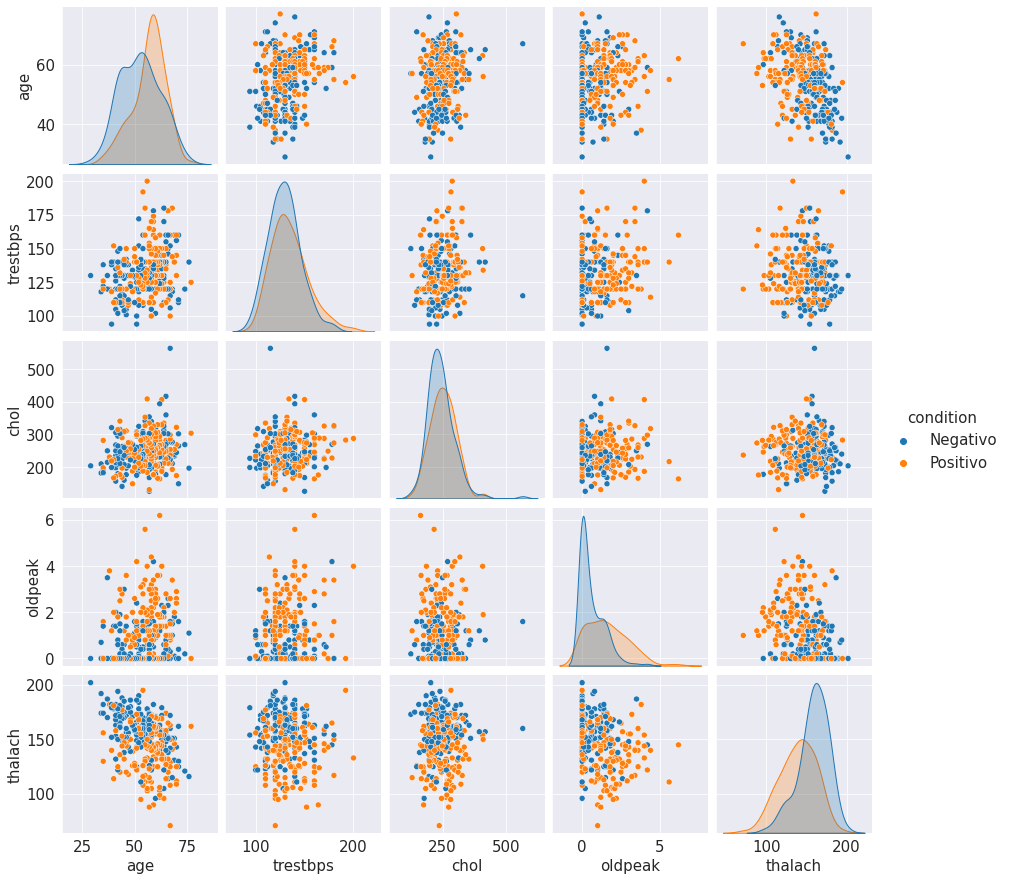

In [9]:
num_var = ["age", "trestbps", "chol", "oldpeak", "condition", "thalach"]
num_df = exp_heart[num_var]

sns.pairplot(num_df, hue="condition");

No gráfico acima, estuda-se ainda a dispersão conjunta das variáveis numéricas, bem como sua relação com a variável-alvo. A variável age, como visto nos histogramas exibidos anteriormente, parece permitir distinguir pacientes doentes de saudáveis quando apresenta valores altos. Oldpeak apresenta características semelhantes, enquanto thalac tem maior presença de pacientes doentes em valores baixos. Pelos gráficos de dispersão, não é possível discernir um critério de separação claro entre as variáveis numéricas, bem como não parece sugerir que não há correlação significativa entre elas que possa ser explorada em análise e modelagem.

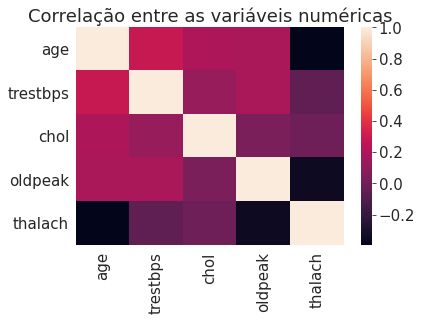

In [10]:
corr_variables = ["age", "trestbps", "chol", "oldpeak", "condition", "thalach"]

corr_df = exp_heart[corr_variables].corr()
sns.heatmap(corr_df);
plt.title("Correlação entre as variáveis numéricas");

O mapa de calor acima, ilustrando a correlação de Pearson entre as variáveis numéricas, indicam que de fato não parece haver correlação (linear) entre as variáveis numéricas da base de dados.

Em uma última tentativa de distinguir possíveis vias de distinguir duas classes alvo, é utilizada ainda a análise de componentes principais para tornar possível a visualização o dataset em duas dimensões, considerando a classe-alvo.

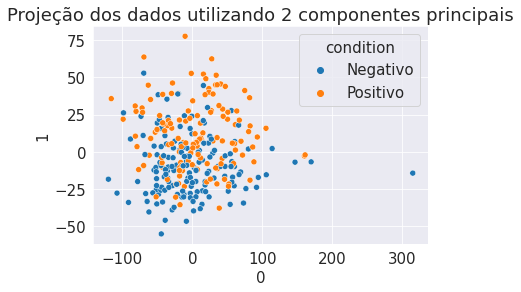

In [11]:
baseline_df = exp_heart.copy()
baseline_df["sex"] = baseline_df["sex"].cat.codes
baseline_df["fbs"] = baseline_df["fbs"].cat.codes
baseline_df["exang"] = baseline_df["exang"].cat.codes
baseline_df["condition"] = baseline_df["condition"].cat.codes
baseline_df["cp"] = baseline_df["cp"].cat.codes
baseline_df["restecg"] = baseline_df["restecg"].cat.codes
baseline_df["slope"] = baseline_df["slope"].cat.codes
baseline_df["thal"] = baseline_df["thal"].cat.codes


pca = PCA(n_components=2)
pca_result = pca.fit_transform(baseline_df.loc[:, baseline_df.columns != "condition"])
pca_df = pd.DataFrame(pca_result)
pca_df["condition"] = exp_heart["condition"]
pca_df.iloc[:,0]
sns.scatterplot(data=pca_df, x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue="condition");
plt.title("Projeção dos dados utilizando 2 componentes principais");

Utilizando 2 componentes principais, a projeção dos dados neste novo espaço reflete a proximidade dos pontos pertencentes às duas classes. Nestas circunstâncias, a separação em classes distintas pode ser dificultada.

Com base nas análises acima, parecem destacar-se as variáveis sex, age, cp, exang, ca e oldpeak como candidatos a fatores preditores da variável condition. Além disso, o valor 1 da variável thal (talassemia, defeito fixo) também é um possível indicador. As etapas a seguir tratarão de pré-processamento, modelagem e avaliação de modelos.

Primeiramente, serão ajustados modelos no dataset com mínimo pré-processamento, de maneira a obter uma referência de desempenho de onde possíveis melhorias podem ser identificadas. Neste passo, as variáveis categóricas serão convertidas em números inteiros e os modelos serão avaliados utilizando 10-fold cross validation.

In [12]:
baseline_df = exp_heart.copy()
baseline_df["sex"] = baseline_df["sex"].cat.codes
baseline_df["fbs"] = baseline_df["fbs"].cat.codes
baseline_df["exang"] = baseline_df["exang"].cat.codes
baseline_df["condition"] = baseline_df["condition"].cat.codes
baseline_df["cp"] = baseline_df["cp"].cat.codes
baseline_df["restecg"] = baseline_df["restecg"].cat.codes
baseline_df["slope"] = baseline_df["slope"].cat.codes
baseline_df["thal"] = baseline_df["thal"].cat.codes
baseline_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,2,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,2,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,2,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,1,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,1,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,1,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,2,0


In [13]:
#cat_vars = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "condition"]
#num_vars = ["age", "trestbps", "chol", "oldpeak"]
#to_dummy_vars = ["cp", "restecg", "slope", "ca", "thal"]
#non_dummy_cat_vars = ["sex", "fbs", "exang", "condition"]

def evaluate_knn(n_neighbors, df, score_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    
    kfold = KFold(n_splits=10)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    test_scores = []
    train_scores= []
    
    for train_indexes, test_indexes in kfold.split(x, y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]

        model = knn.fit(x_train, y_train)
        
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('KNN '+str(n_neighbors)+' vizinhos')
    
    scores_dict['Precisão média (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Precisão média (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    
    return scores_dict

def evaluate_logistic_regression(df, scores_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    kfold = KFold(n_splits=10)
    
    test_scores = []
    train_scores= []
    for train_indexes, test_indexes in kfold.split(x,y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]

        model = LogisticRegression(random_state=0).fit(x_train, y_train)
       
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('Regressão logística')
    
    scores_dict['Precisão média (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Precisão média (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    return scores_dict
    
    
def evaluate_random_forest(df, scores_dict, max_depth=None):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    kfold = KFold(n_splits=10)
    test_scores = []
    train_scores= []
    
    for train_indexes, test_indexes in kfold.split(x,y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]    
    
        model = RandomForestClassifier(random_state=0, max_depth=max_depth).fit(x_train, y_train)
        
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    if(max_depth is None):
        scores_dict['Algoritmo'].append('Random Forest')
    else:
        scores_dict['Algoritmo'].append('Random Forest Profund. '+str(max_depth))
    
    scores_dict['Precisão média (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Precisão média (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    return scores_dict

scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}
for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, baseline_df, scores_dict)

scores_dict = evaluate_logistic_regression(baseline_df, scores_dict)
scores_dict = evaluate_random_forest(baseline_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Algoritmo,Precisão média (treino),Desvio padrão (treino),Precisão média (teste),Desvio padrão (teste)
0,KNN 1 vizinhos,1.000000,0.000000,0.552069,0.095420
1,KNN 2 vizinhos,0.778899,0.007940,0.554713,0.124276
2,KNN 3 vizinhos,0.771790,0.006326,0.629425,0.072379
3,KNN 4 vizinhos,0.760188,0.009247,0.625287,0.127659
4,KNN 5 vizinhos,0.778156,0.012908,0.629425,0.085264
5,KNN 6 vizinhos,0.732133,0.013887,0.608621,0.101673
6,KNN 7 vizinhos,0.750094,0.013026,0.656782,0.061888
7,KNN 8 vizinhos,0.726536,0.010725,0.622759,0.094446
8,KNN 9 vizinhos,0.730646,0.012367,0.612989,0.084978
9,KNN 10 vizinhos,0.714178,0.008429,0.625747,0.090966


O teste inicial foi realizado com os algoritmos KNN, regressão logística e Random Forest. O KNN foi testado com 10 diferentes valores para o hiperparâmetro número de vizinhos, enquanto o Random Forest e a regressão logística foram inicializados com seus valores padrão.

A maior precisão média, de 82.87%, foi alcançada pela regressão logística, seguida pelo Random Forest com 81.50%. O melhor desempenho obtido pelo KNN foi de 65% com 7 vizinhos, o que era esperado dado que a falta de pré-processamento implica na dominância das variáveis numéricas sobre as demais.

No próximo teste, as variáveis numéricas serão normalizadas.

In [14]:
features = ["sex", "age", "cp", "exang", "ca", "oldpeak", "slope", "condition", "thal"]

numerical = ["age", "trestbps", "chol","oldpeak", "thalach"]
#filtered_df = baseline_df[features].copy()
filtered_df = baseline_df.copy()

scaler = StandardScaler()
norm_filtered_df = filtered_df.copy()
norm_filtered_df[numerical] = pd.DataFrame(scaler.fit_transform(norm_filtered_df[numerical]), columns=numerical)
#norm_filtered_df["oldpeak"] = pd.DataFrame(std_scaler.fit_transform(norm_filtered_df[["oldpeak"]]), columns=["oldpeak"])
norm_filtered_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,1,0,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,1,1,2,0
1,1.600302,0,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,2,2,0
2,1.268242,0,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,2,0,2,0
3,1.157555,1,0,0.355633,0.667499,1,2,1.065396,0,0.295874,1,1,2,1
4,1.046868,1,0,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.609620,1,3,1.145127,-0.469085,0,0,1.371034,0,-0.906712,0,0,1,1
293,-1.720306,1,3,-0.772215,-0.546141,0,0,-0.419131,0,0.124076,1,0,1,1
294,-2.163054,1,3,-0.659431,-0.950688,0,0,-0.855757,1,0.467672,1,0,1,1
295,-2.163054,0,3,0.355633,-1.239649,0,0,1.414697,0,0.295874,0,0,2,0


In [15]:
scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}

for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, norm_filtered_df, scores_dict)

scores_dict = evaluate_logistic_regression(norm_filtered_df, scores_dict)
scores_dict = evaluate_random_forest(norm_filtered_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Algoritmo,Precisão média (treino),Desvio padrão (treino),Precisão média (teste),Desvio padrão (teste)
0,KNN 1 vizinhos,1.000000,0.000000,0.741264,0.061662
1,KNN 2 vizinhos,0.882907,0.009427,0.730575,0.068897
2,KNN 3 vizinhos,0.876171,0.007154,0.768161,0.084113
3,KNN 4 vizinhos,0.853355,0.009608,0.784483,0.069588
4,KNN 5 vizinhos,0.866813,0.005909,0.784713,0.076993
5,KNN 6 vizinhos,0.853727,0.011458,0.791034,0.073969
6,KNN 7 vizinhos,0.848489,0.009858,0.808046,0.060965
7,KNN 8 vizinhos,0.829779,0.008727,0.808046,0.069370
8,KNN 9 vizinhos,0.845127,0.009915,0.804713,0.076618
9,KNN 10 vizinhos,0.830155,0.007273,0.807931,0.078560


O KNN apresentou grande melhora, mostrando maior precisão média de 80,8%  no conjunto de teste com 7 e 8 vizinhos, comparando com o 65% obtido anteriormente com 7 vizinhos. A regressão logística atingiu 83%, em comparação com os 82% observados anteriormente, enquanto o Random Forest permaneceu em 81%.

A proxima estratégia de pré-processamento consistirá em converter as variáveis categóricas não-binárias, cp, ca, slope e thal, em dummies. 

In [16]:
to_dummy_vars = ["cp", "ca", "slope", "thal"]
dummy_df = pd.get_dummies(norm_filtered_df, columns=to_dummy_vars)
dummy_df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,condition,...,ca_0,ca_1,ca_2,ca_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,1.600302,1,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,0,...,0,1,0,0,0,1,0,0,0,1
1,1.600302,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,...,0,0,1,0,1,0,0,0,0,1
2,1.268242,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,0,...,1,0,0,0,0,0,1,0,0,1
3,1.157555,1,0.355633,0.667499,1,2,1.065396,0,0.295874,1,...,0,1,0,0,0,1,0,0,0,1
4,1.046868,1,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.609620,1,1.145127,-0.469085,0,0,1.371034,0,-0.906712,1,...,1,0,0,0,1,0,0,0,1,0
293,-1.720306,1,-0.772215,-0.546141,0,0,-0.419131,0,0.124076,1,...,1,0,0,0,0,1,0,0,1,0
294,-2.163054,1,-0.659431,-0.950688,0,0,-0.855757,1,0.467672,1,...,1,0,0,0,0,1,0,0,1,0
295,-2.163054,0,0.355633,-1.239649,0,0,1.414697,0,0.295874,0,...,1,0,0,0,1,0,0,0,0,1


In [17]:
scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}

for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, dummy_df, scores_dict)

scores_dict = evaluate_logistic_regression(dummy_df, scores_dict)
scores_dict = evaluate_random_forest(dummy_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Algoritmo,Precisão média (treino),Desvio padrão (treino),Precisão média (teste),Desvio padrão (teste)
0,KNN 1 vizinhos,1.000000,0.000000,0.741494,0.086761
1,KNN 2 vizinhos,0.856353,0.011941,0.737586,0.054328
2,KNN 3 vizinhos,0.884774,0.009273,0.784828,0.057370
3,KNN 4 vizinhos,0.865333,0.012245,0.801609,0.071843
4,KNN 5 vizinhos,0.882908,0.010529,0.808391,0.067892
5,KNN 6 vizinhos,0.866825,0.007550,0.821724,0.068663
6,KNN 7 vizinhos,0.881037,0.009662,0.818736,0.087196
7,KNN 8 vizinhos,0.866074,0.010874,0.811609,0.070572
8,KNN 9 vizinhos,0.867567,0.007848,0.805057,0.067633
9,KNN 10 vizinhos,0.852602,0.006679,0.804943,0.094173


A regressão logística ainda apresentou maior precisão média no conjunto de teste, atingindo 84,48% em comparação com o 83,18% de anteriormente. 

O Random Forest atingiu 100% no conjunto de treino, mas manteve 81.1% no conjunto de teste, indicando provável ocorrência de overfitting. Dado que o padrão da biblioteca sklearn é não limitar a profundidade das árvores que compõem o classificador, é possível que um ajuste dos hiperparâmetros melhore seu desempenho.

O KNN, por sua vez, também demonstrou uma pequena melhora ao alcançar 82.1% com k=6, superando o 80,8% do teste anterior.

Repete-se o teste do modelo Random Forest com diferentes limites para a profundidade das árvores.

Profundidade  3  


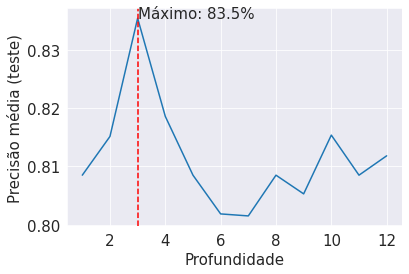

In [18]:
scores_dict = {'Algoritmo' : [], 'Precisão média (treino)':[], 'Desvio padrão (treino)': [],
              'Precisão média (teste)':[], 'Desvio padrão (teste)' :[]}

#for n_neighbors in range(1, 11):
#    scores_dict = evaluate_knn(n_neighbors, dummy_df, scores_dict)

tree_dict = {'Profundidade': [], 'Precisão média (treino)': [], 'Precisão média (teste)': []}
for depth in range(1, 13):
    scores_dict = evaluate_random_forest(dummy_df, scores_dict, max_depth=depth)
    tree_dict["Profundidade"].append(depth)
    tree_dict["Precisão média (treino)"].append(scores_dict["Precisão média (treino)"][depth-1])
    tree_dict["Precisão média (teste)"].append(scores_dict["Precisão média (teste)"][depth-1])
    
#scores_dict = evaluate_logistic_regression(dummy_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
tree_df = pd.DataFrame.from_dict(tree_dict)

plot = sns.lineplot(x=tree_df["Profundidade"], y=tree_df["Precisão média (teste)"])
max_row = tree_df[tree_df['Precisão média (teste)'] == tree_df['Precisão média (teste)'].max()]
max_index = max_row["Profundidade"].iloc[0]
max_value = max_row["Precisão média (teste)"].iloc[0]

plt.axvline(max_index, color='r', linestyle='--')
plt.text(x=max_index, y=max_value, s="Máximo: 83.5%")
print('Profundidade ', max_index, ' ' )

Nota-se que a precisão da Random Forest atingiu o máximo limitando-se a profundidade a 3, alcançando 83.5% em comparação com o 81.1% obtido nos testes anteriores. Além disso, a precisão média do conjunto de treino é mais próxima, 87%, indicando menor probabilidade de overfitting. Com profundidade a partir de 7, o classificador passa a obter precisão quase perfeita no conjunto de treino sem apresentar melhorias no conjunto de teste, indicando sinais de overfitting.

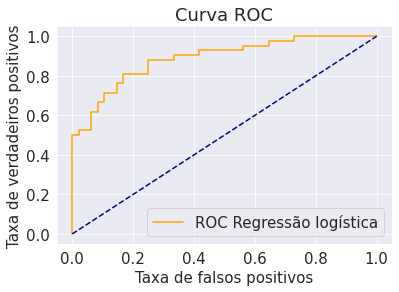

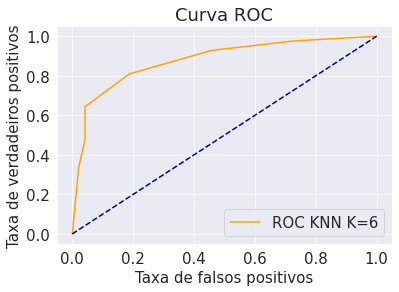

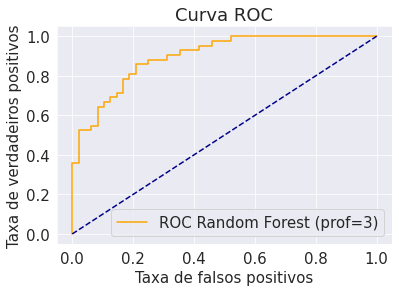

In [26]:
def plot_roc_curve(fper, tper, model_name):  
    plt.plot(fper, tper, color='orange', label='ROC '+model_name)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

x = dummy_df.loc[:, dummy_df.columns != "condition"]
y = dummy_df["condition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

auc_dict = {'Algoritmo': [], 'AUC':[]}
model = LogisticRegression(random_state=0).fit(x_train, y_train)
probabilities = model.predict_proba(x_test)
probabilities = probabilities[:, 1]
false_positives, true_positives, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(false_positives, true_positives, "Regressão logística")
auc_dict["Algoritmo"].append('Regressão logística')
auc_dict["AUC"].append(auc(false_positives, true_positives))

model = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
probabilities = model.predict_proba(x_test)
probabilities = probabilities[:, 1]
false_positives, true_positives, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(false_positives, true_positives, "KNN K=6")
auc_dict["Algoritmo"].append('KNN K=6')
auc_dict["AUC"].append(auc(false_positives, true_positives))

model = RandomForestClassifier(random_state=0, max_depth=3).fit(x_train, y_train)
probabilities = model.predict_proba(x_test)
probabilities = probabilities[:, 1]
false_positives, true_positives, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(false_positives, true_positives, "Random Forest (prof=3)")
auc_dict["Algoritmo"].append('Random forest (prof=3)')
auc_dict["AUC"].append(auc(false_positives, true_positives))

In [27]:
auc_df = pd.DataFrame.from_dict(auc_dict)
auc_df

,Algoritmo,AUC
0,Regressão logística,0.887897
1,KNN K=6,0.878720
2,Random forest (prof=3),0.896825


Conforme indicado pelas curvas ROC e pelo valor da AUC (area under curve), o classificador baseado em Random Forest foi capaz de discernir verdadeiros positivos e falsos positivos com precisão muito próxima à da regressão logística, superando-a por uma margem pequena. Por sua vez, o classificador baseado em KNN com K=6 alcançou AUC mais baixo que os demais modelos.

Text(0.5, 1.0, 'Matriz de confusão Random Forest')

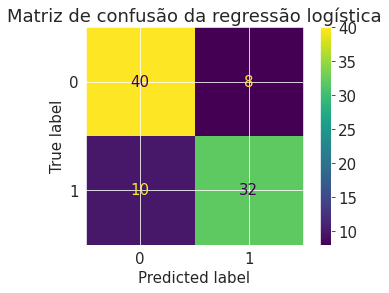

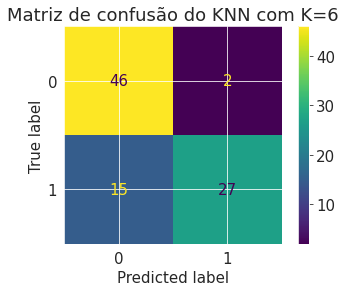

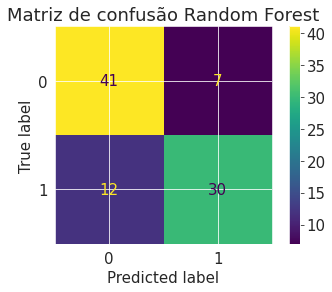

In [29]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LogisticRegression(random_state=0).fit(x_train, y_train)
model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
plt.title("Matriz de confusão da regressão logística")

model = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
plt.title("Matriz de confusão do KNN com K=6")

model = RandomForestClassifier(random_state=0, max_depth=3).fit(x_train, y_train)
model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
plt.title("Matriz de confusão Random Forest")

As matrizes de confusão confirmam o resultado observado nas curvas ROC, em que a random forest e a regressão logística atingiram métricas de desempenho muito próximas.

O KNN, por sua vez, resultou em maior quantidade de falsos negativos. Para os propósito de diagnóstico de doenças cardíacas, falsos negativos são indesejáveis e, portanto, este classificador deve ser evitado.

[1]https://drauziovarella.uol.com.br/doencas-e-sintomas/angina/

[2]http://www.saude.gov.br/saude-de-a-z/diabetes

[3]https://www.healthcareimaging.com.au/angiography-healthcare-imaging-services.html